In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
#!python -m spacy download en_core_web_md

In [ ]:
import pandas as pd
df=pd.read_csv("Elon_musk.csv",error_bad_lines=False,sep=";", encoding='mac_roman')
df.head()

b'Skipping line 29: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 49: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 2\nSkipping line 69: expected 1 fields, saw 2\nSkipping line 98: expected 1 fields, saw 2\nSkipping line 113: expected 1 fields, saw 2\nSkipping line 120: expected 1 fields, saw 2\nSkipping line 137: expected 1 fields, saw 2\nSkipping line 141: expected 1 fields, saw 2\nSkipping line 149: expected 1 fields, saw 2\nSkipping line 154: expected 1 fields, saw 3\nSkipping line 155: expected 1 fields, saw 2\nSkipping line 163: expected 1 fields, saw 2\nSkipping line 184: expected 1 fields, saw 2\nSkipping line 188: expected 1 fields, saw 2\nSkipping line 189: expected 1 fields, saw 2\nSkipping line 211: expected 1 fields, saw 2\nSkipping line 221: expected 1 fields, saw 2\nSkipping line 231: expected 1 fields, saw 2\nSkipping line 233: expected 1 fields, saw 2\nSkipping line 236: expected 1 fields, saw 2\nSkipping line 

,",Text"
0,"1,@kunalb11 Iím an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."


In [ ]:
df = df.rename(columns={',Text': 'Text'})

In [ ]:
df = [Text.strip() for Text in df.Text] # remove both the leading and the trailing characters
df = [Text for Text in df if Text] # removes empty strings, because they are considered in Python as False
df[0:10]

['1,@kunalb11 Iím an alien',
 '2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '3,@joerogan @Spotify Great interview!',
 '4,@gtera27 Doge is underestimated',
 '5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 '6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 '7,"Frodo was the underdoge,',
 'All thought he would fail,',
 'Himself most of all. https://t.co/zGxJFDzzrM"',
 '8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)']

In [ ]:
# Joining the list into one string/text
text = ' '.join(df)
text

'1,@kunalb11 Iím an alien 2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? 3,@joerogan @Spotify Great interview! 4,@gtera27 Doge is underestimated 5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! 6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj 7,"Frodo was the underdoge, All thought he would fail, Himself most of all. https://t.co/zGxJFDzzrM" 8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) 9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. 10,The most entertaining outcome is the most likely 11,@GiveDirectly Just sent some 12,Just agree to do Clubhouse with @kanyewest 13,https://t.co/3rWE9uHSTS 14,@geoffkeighley @UnrealEngine Itís getting real 15,"Bought some Dogecoin for lil X, so he can be a toddler hodler" 16,"@JoshManMode He definitely has issues, but the sentencing seems a bit high" 17,@freewalletorg Thanks for fixing 18,@freewalletorg Please u

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(df))
sentences[5:15]

['6,Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj 7,"Frodo was the underdoge, All thought he would fail, Himself most of all.',
 'https://t.co/zGxJFDzzrM" 8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) 9,@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 '10,The most entertaining outcome is the most likely 11,@GiveDirectly Just sent some 12,Just agree to do Clubhouse with @kanyewest 13,https://t.co/3rWE9uHSTS 14,@geoffkeighley @UnrealEngine Itís getting real 15,"Bought some Dogecoin for lil X, so he can be a toddler hodler" 16,"@JoshManMode He definitely has issues, but the sentencing seems a bit high" 17,@freewalletorg Thanks for fixing 18,@freewalletorg Please unlock my account 19,@AstroJordy <U+0001F923><U+0001F923> 20,This is true power haha https://t.co/Fc9uhQSd7O 21,@freewalletorg Any crypto wallet that wonít give you your private keys should be avoided at all costs 22,@freewalletorg Your app sucks 23,RT @SpaceX: NASA has se

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"1,@kunalb11 Iím an alien 2,@ID_AA_Carmack Ray ..."
1,Have you tried it?
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated 5,@teslacn C..."
4,Now on to the next for even more!!
...,...
777,"1989,@redmercy Yes 1990,""@buzzindelhi Sorry, s..."
778,"1991,""@kenyanwalstreet Not actually a payout, ..."
779,"It may never pay out, as the stock canít bÖ ht..."
780,"Details Aug 28."""


In [ ]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
426,Gives a false sense ofÖ https://t.co/aIGaEnC8f...,10,41
552,"ItísÖ https://t.co/IxhyT6NuiC"" 1387,""@flcnhvy ...",10,31
687,"Might be able toÖ https://t.co/FB7e5nOq2E"" 175...",10,72
137,"413,@harsimranbansal @heydave7 It will most li...",11,61
90,"294,@Erdayastronaut @SpaceX Was also thinking ...",11,52
557,"Itís not useful for predicting the future, nor...",12,118
161,"Also, wÖ https://t.co/IYdKttVsqk"" 465,@cleante...",12,99
69,"229,@teslaownersSV This is a good one 230,@MrB...",13,38
32,"82,""@ajtourville @Erdayastronaut @SpaceX Yes, ...",14,184
609,We just havenít observed theÖ https://t.co/mez...,16,72


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    782.000000
mean       1.473146
std        2.691794
min       -7.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [ ]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,"1,@kunalb11 Iím an alien 2,@ID_AA_Carmack Ray ...",0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,"6,Happy New Year of the Ox!",0,6
6,"https://t.co/9WFKMYu2oj 7,""Frodo was the under...",-2,14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


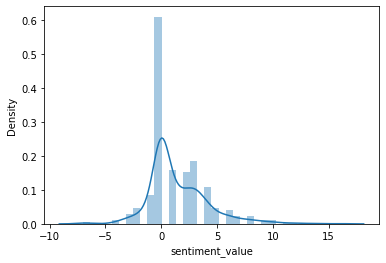

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

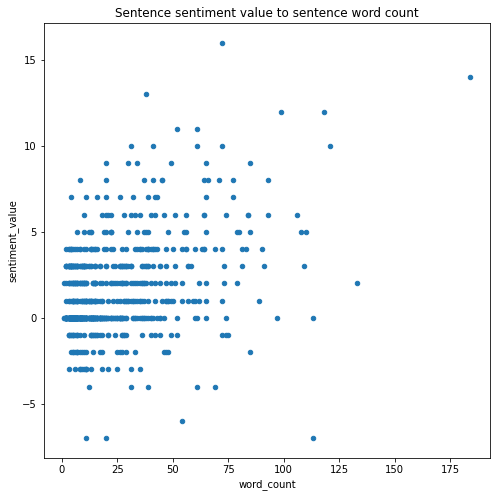

In [ ]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')